# Рубежный контроль№1

## 18 вариант: задача №3, набор данных 2
Для заданного набора данных произведите масштабирование данных (для одного признака) и преобразование категориальных признаков в количественные двумя способами (label encoding, one hot encoding) для одного признака. Какие методы Вы использовали для решения задачи и почему?

In [198]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

In [199]:
data = pd.read_csv('dc-wikia-data.csv')

In [200]:
data.shape

(6896, 13)

In [201]:
data.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR
0,1422,Batman (Bruce Wayne),\/wiki\/Batman_(Bruce_Wayne),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3093.0,"1939, May",1939.0
1,23387,Superman (Clark Kent),\/wiki\/Superman_(Clark_Kent),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2496.0,"1986, October",1986.0
2,1458,Green Lantern (Hal Jordan),\/wiki\/Green_Lantern_(Hal_Jordan),Secret Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,NaN,Living Characters,1565.0,"1959, October",1959.0
3,1659,James Gordon (New Earth),\/wiki\/James_Gordon_(New_Earth),Public Identity,Good Characters,Brown Eyes,White Hair,Male Characters,NaN,Living Characters,1316.0,"1987, February",1987.0
4,1576,Richard Grayson (New Earth),\/wiki\/Richard_Grayson_(New_Earth),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,1237.0,"1940, April",1940.0


In [202]:
data.dropna(subset=['SEX'], inplace=True)

In [203]:
data.isnull().sum()

page_id                0
name                   0
urlslug                0
ID                  1943
ALIGN                576
EYE                 3525
HAIR                2163
SEX                    0
GSM                 6707
ALIVE                  2
APPEARANCES          344
FIRST APPEARANCE      68
YEAR                  68
dtype: int64

## Преобразование категориальных признаков в числовые

In [204]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

### 1. one hot encoding

In [205]:
ohe = OneHotEncoder()
data['SEX'] = ohe.fit_transform(data[['SEX']])

In [206]:
data.shape

(6771, 13)

In [207]:
data['SEX']

0         (0, 2)\t1.0\n  (1, 2)\t1.0\n  (2, 2)\t1.0\n ...
1         (0, 2)\t1.0\n  (1, 2)\t1.0\n  (2, 2)\t1.0\n ...
2         (0, 2)\t1.0\n  (1, 2)\t1.0\n  (2, 2)\t1.0\n ...
3         (0, 2)\t1.0\n  (1, 2)\t1.0\n  (2, 2)\t1.0\n ...
4         (0, 2)\t1.0\n  (1, 2)\t1.0\n  (2, 2)\t1.0\n ...
                              ...                        
6891      (0, 2)\t1.0\n  (1, 2)\t1.0\n  (2, 2)\t1.0\n ...
6892      (0, 2)\t1.0\n  (1, 2)\t1.0\n  (2, 2)\t1.0\n ...
6893      (0, 2)\t1.0\n  (1, 2)\t1.0\n  (2, 2)\t1.0\n ...
6894      (0, 2)\t1.0\n  (1, 2)\t1.0\n  (2, 2)\t1.0\n ...
6895      (0, 2)\t1.0\n  (1, 2)\t1.0\n  (2, 2)\t1.0\n ...
Name: SEX, Length: 6771, dtype: object

### 2. label encoding

In [208]:
data = pd.read_csv('dc-wikia-data.csv')
data.dropna(subset=['SEX'], inplace=True)

In [209]:
data['SEX'].unique()

array(['Male Characters', 'Female Characters', 'Genderless Characters',
       'Transgender Characters'], dtype=object)

In [210]:
le=LabelEncoder()

In [211]:
data['SEX'] = le.fit_transform(data['SEX'])


In [212]:
data['SEX'].unique()

array([2, 0, 1, 3], dtype=int64)

In [213]:
le.inverse_transform([0, 1, 2, 3])

array(['Female Characters', 'Genderless Characters', 'Male Characters',
       'Transgender Characters'], dtype=object)

In [214]:
data['SEX']

0       2
1       2
2       2
3       2
4       2
       ..
6891    0
6892    2
6893    2
6894    2
6895    2
Name: SEX, Length: 6771, dtype: int32


Основная проблема использование LabelEncoder заключается в том, что числовой код создал евклидово представление для данных.
Но это всего лишь категориальные данные, и между числами на самом деле нет никакой связи.Проблема здесь в том, что, поскольку разные числа в одном столбце, модель неправильно подумает, что данные находятся в каком-то особом порядке — 0 < 1 < 2. Но на этом основаны метрики близости объектов, что делает бессмысленным применение метода ближайшего соседа на данных в таком виде. Аналогичным образом, никакого смысла не будет иметь применение линейных моделей. Для решения проблемы мы используем OneHotEncoder.

 

## Масштабирование данных

Многие методы машинного обучения ожидают или более эффективны, если атрибуты данных имеют одинаковый масштаб. Масштабирование предполагает изменение диапазона измерения величины, а нормализация - изменение распределения этой величины.


In [215]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

### Масштабирование данных на основе Z-оценки - StandardScaler

In [216]:
data.dropna(subset=['APPEARANCES'], inplace=True)

In [217]:
ss1 = StandardScaler()
ss1_data = ss1.fit_transform(data[['APPEARANCES']])

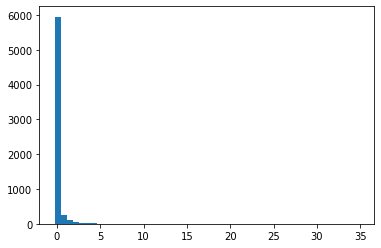

In [218]:
plt.hist(ss1_data, 50)
plt.show()

 ### MinMax масштабирование

In [219]:
ss2 = MinMaxScaler()
ss2_data = ss2.fit_transform(data[['APPEARANCES']])

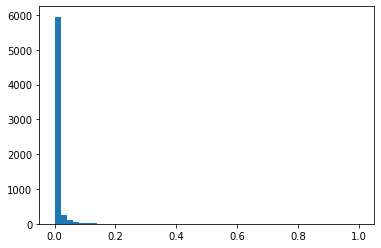

In [220]:
plt.hist(ss2_data, 50)
plt.show()